<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">
*This notebook contains an excerpt from the book Machine Learning for OpenCV by Michael Beyeler; the content is available [on GitHub](https://github.com/mbeyeler/opencv-machine-learning).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](https://github.com/mbeyeler/opencv-machine-learning)!*

<!--NAVIGATION-->
< [Dealing with Data Using OpenCV's TrainData Container in C++](02.05-Dealing-with-Data-Using-the-OpenCV-TrainData-Container-in-C++.ipynb) | [Contents](../README.md) | [None](04.00-Representing-Data-and-Engineering-Features.ipynb) >

# Logistic Regression

blah

## Logistic Regression in OpenCV

blah

In [1]:
import numpy as np
import cv2

from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('ggplot')

### Loading the dataset

In [3]:
iris = datasets.load_iris()

In [4]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [5]:
iris.data.shape

(150, 4)

In [6]:
iris.target.shape

(150,)

In [7]:
np.unique(iris.target)

array([0, 1, 2])

### Making it a binary classification problem

In [8]:
idx = iris.target != 2
data = iris.data[idx].astype(np.float32)
target = iris.target[idx].astype(np.float32)

### Inspecting the data

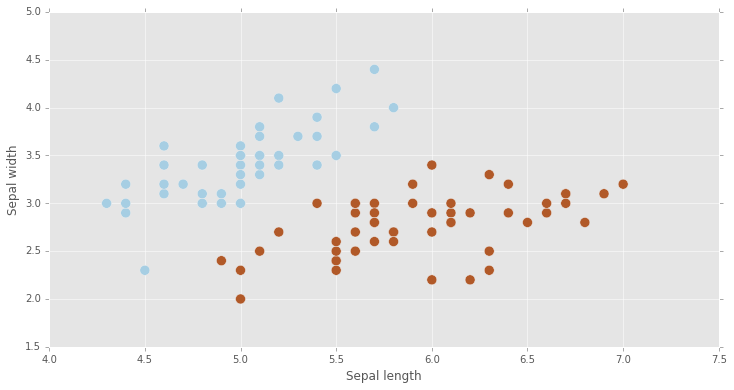

In [9]:
plt.figure(figsize=(12, 6))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap=plt.cm.Paired, s=100)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

### Splitting the data into training and test sets

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target, test_size=0.1, random_state=42)

In [11]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [12]:
X_test.shape, y_test.shape

((10, 4), (10,))

### Training the classifier

In [13]:
lr = cv2.ml.LogisticRegression_create()

In [14]:
lr.setTrainMethod(cv2.ml.LogisticRegression_MINI_BATCH)
lr.setMiniBatchSize(1)

In [15]:
lr.setRegularization(cv2.ml.LogisticRegression_REG_L2)
lr.setIterations(100)

In [16]:
lr.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

True

In [17]:
lr.get_learnt_thetas()

array([[-0.04109113, -0.01968078, -0.16216497,  0.28704911,  0.11945518]], dtype=float32)

In [18]:
ret, y_pred = lr.predict(X_train)

In [19]:
metrics.accuracy_score(y_train, y_pred)

1.0

### Testing the classifier

In [20]:
ret, y_pred = lr.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

1.0

<!--NAVIGATION-->
< [Dealing with Data Using OpenCV's TrainData Container in C++](02.05-Dealing-with-Data-Using-the-OpenCV-TrainData-Container-in-C++.ipynb) | [Contents](../README.md) | [None](04.00-Representing-Data-and-Engineering-Features.ipynb) >